In [79]:
import sys
import os

# Path to the directory where your Jupyter Notebook is located
notebook_dir = '/Users/ronlodetti/Documents/Flatiron/capstone/airline_sentiment_analysis/hidden'

# Get the parent directory (where your `src` directory is located)
parent_dir = os.path.dirname(notebook_dir)

# Add the parent directory to sys.path
if parent_dir not in sys.path:
    sys.path.append(parent_dir)

# Now you can import your module
from src import data_understanding as du
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [32]:
import pandas as pd
df = pd.read_csv('../data/Airline_review.csv')[['Review_Title','Review','Recommended']]
df.head()

,Review_Title,Review,Recommended
0,"""pretty decent airline""",Moroni to Moheli. Turned out to be a pretty ...,yes
1,"""Not a good airline""",Moroni to Anjouan. It is a very small airline...,no
2,"""flight was fortunately short""",Anjouan to Dzaoudzi. A very small airline an...,no
3,"""I will never fly again with Adria""",Please do a favor yourself and do not fly wi...,no
4,"""it ruined our last days of holidays""",Do not book a flight with this airline! My fr...,no


In [ ]:
df.info()

## Data Understanding
[Description of dataset]

In [ ]:
Number and distribution of target
Number of words per review (unclean) separated by target
Number of charcters per review (unclean) separated by target
Frequency distribution of words

In [33]:
df['reviews'] = df['Review_Title'] + ' ' + df['Review']
df['clean_review'] = du.preprocess_texts(df['reviews'], stop_words=None, lemmatize=False)
df['tokens'] = df['clean_review'].apply(lambda x : x.split())
df['word_count'] = df['tokens'].apply(lambda x: len(x))
df['char_count'] = df['clean_review'].apply(lambda x: len(x))
df = df.drop(['Review_Title','Review','reviews'],axis=1)

In [116]:
yes_df = df.loc[df['Recommended']=='yes'].copy()
no_df = df.loc[df['Recommended']=='no'].copy()

In [16]:
# Number and distribution of target
display(df['Recommended'].value_counts())
print('')
display(df['Recommended'].value_counts(normalize=True))

Recommended
no     15364
yes     7807
Name: count, dtype: int64

Recommended
no     0.66307
yes    0.33693
Name: proportion, dtype: float64

/opt/miniconda3/envs/capstone-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/miniconda3/envs/capstone-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='word_count', ylabel='Count'>

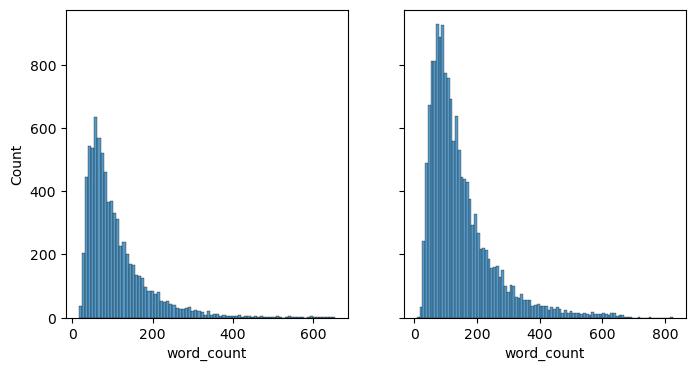

In [117]:
fig, ax = plt.subplots(1,2,figsize=(8,4), sharey=True)

sns.histplot(yes_df, x='word_count',ax=ax[0])
sns.histplot(no_df, x='word_count',ax=ax[1])


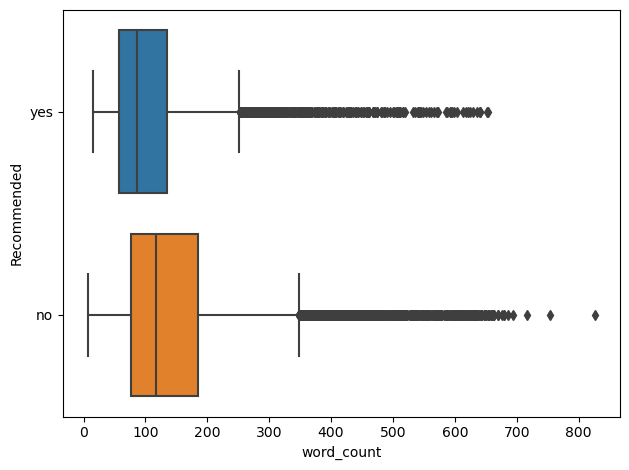

In [131]:
sns.boxplot(data=df, x='word_count', y='Recommended', hue='Recommended',dodge=False)
plt.legend().remove()
plt.tight_layout()
plt.show()

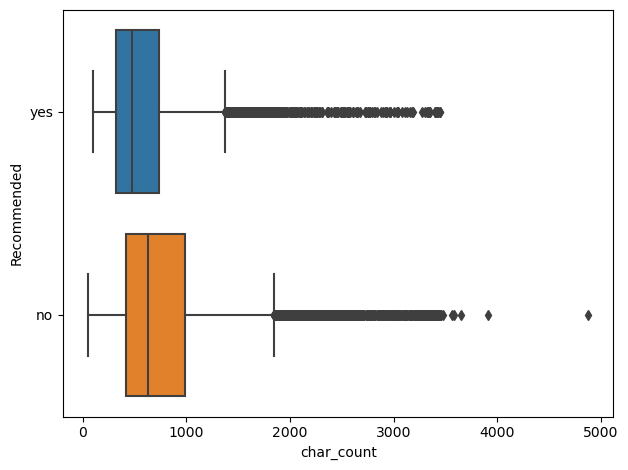

In [132]:
sns.boxplot(data=df, x='char_count', y='Recommended', hue='Recommended',dodge=False)
plt.legend().remove()
plt.tight_layout()
plt.show()

### Stopped & Lemmatized Data

In [105]:
from nltk.corpus import stopwords
STOPWORDS = stopwords.words('english')
STOPWORDS.append("us")
STOPWORDS.append("u")
df2 = pd.read_csv('../data/Airline_review.csv')[['Review_Title','Review','Recommended']]
df2['reviews'] = df2['Review_Title'] + ' ' + df2['Review']
df2['clean_review'] = du.preprocess_texts(df2['reviews'], stop_words=STOPWORDS, lemmatize=True)
df2['tokens'] = df2['clean_review'].apply(lambda x : x.split())
# df2['word_count'] = df2['tokens'].apply(lambda x: len(x))
# df2['char_count'] = df2['clean_review'].apply(lambda x: len(x))
# df2 = df2.drop(['Review_Title','Review','reviews'],axis=1)

In [106]:
yes_df2 = df2.loc[df2['Recommended']=='yes'].copy()
no_df2 = df2.loc[df2['Recommended']=='no'].copy()

In [107]:
yes_tokens = list(yes_df2['tokens'].explode())
no_tokens = list(no_df2['tokens'].explode())

In [108]:
freq_yes = FreqDist(yes_tokens)
freq_no = FreqDist(no_tokens)

In [109]:
distinct_yes = {word: freq_yes[word] - freq_no[word] for word in freq_yes}
distinct_no = {word: freq_no[word] - freq_yes[word] for word in freq_no}

In [110]:
distinct_yes_fd = FreqDist(distinct_yes)
distinct_no_fd = FreqDist(distinct_no)

In [111]:
common_yes = distinct_yes_fd.most_common(10)
common_no = distinct_no_fd.most_common(10)

In [112]:
common_no

[('flight', 21098),
 ('airline', 10886),
 ('hour', 8908),
 ('get', 8780),
 ('customer', 6961),
 ('tell', 6158),
 ('delay', 6069),
 ('bad', 5881),
 ('pay', 5518),
 ('fly', 5393)]

/opt/miniconda3/envs/capstone-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


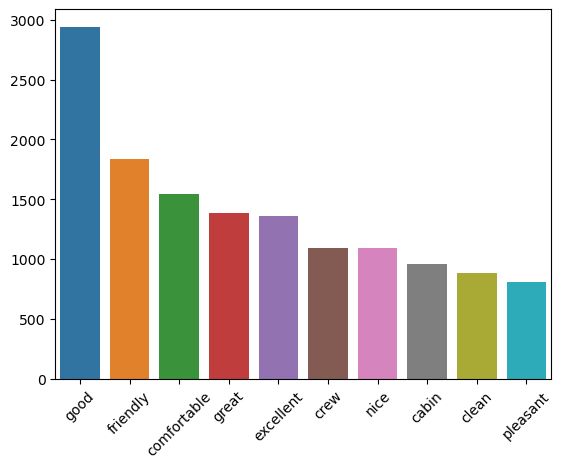

In [113]:
words = []
counts = []
for word, count in common_yes:
    words.append(word)
    counts.append(count)

fig, ax = plt.subplots()
sns.barplot(x=words, y=counts, ax= ax)
plt.xticks(rotation=45)
plt.show()

/opt/miniconda3/envs/capstone-env/lib/python3.11/site-packages/seaborn/_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


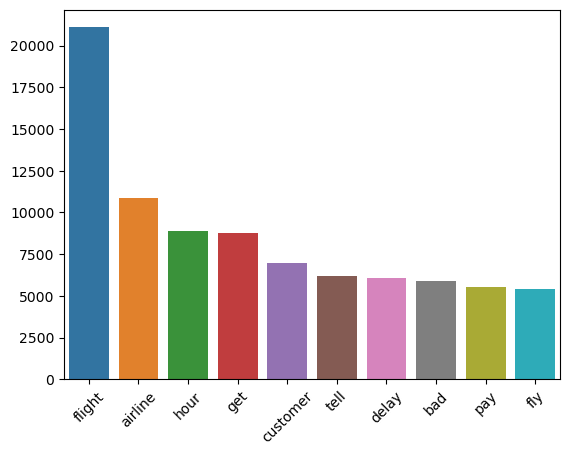

In [114]:
words = []
counts = []
for word, count in common_no:
    words.append(word)
    counts.append(count)

fig, ax = plt.subplots()
sns.barplot(x=words, y=counts, ax= ax)
plt.xticks(rotation=45)
plt.show()